<a href="https://colab.research.google.com/github/Coperr/information-retrieval/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# inforet 1

## getting the data

Today, we will work with the UN General Debate dataset. The corpus consists of 7,507 speeches held at the annual sessions of the United Nations General Assembly from 1970 to 2016. It was created in 2017 by Mikhaylov, Baturo, and Dasandi at Harvard “for understanding and measuring state preferences in world politics.” Each of the almost 200 countries in the United Nations has the opportunity to present its views on global topics such international conflicts, terrorism, or climate change at the annual General Debate.
Work on this data is proposed in the book

- https://github.com/blueprints-for-text-analytics-python/blueprints-text
- from here, but it's easier to use the version on my server.
  - https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/data/un-general-debates/un-general-debates-blueprint.csv.gz



## downloading some toy data

In [2]:
# check if the file un-general-debates-blueprint.csv is present
# if not, download it from the web and unzip it
import os

file_name = 'un-general-debates-blueprint.csv'
gz_file = file_name + '.gz'
url = 'https://gerdes.fr/saclay/inforet/' + gz_file

if os.path.exists(file_name):
    print('File already present')
else:
    print('Downloading the file...')
    os.system(f'curl -o {gz_file} {url}')
    os.system(f'gunzip {gz_file}')

File already present



if you have a problem with the above code,
you can also simply get the zip, unzip and put it manuaylly next to your notbook:

https://gerdes.fr/saclay/informationRetrieval/un-general-debates-blueprint.csv.gz

or try using wget:
```
!wget https://gerdes.fr/saclay/informationRetrieval/un-general-debates-blueprint.csv.gz
import gzip, shutil
with open('un-general-debates-blueprint.csv.gz', 'rb') as f_in:
    with gzip.open('un-general-debates-blueprint.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
```
      

In [3]:
# this turns on the autotimer, so that every cell has a timing information below
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
# to stop using autotime, run the following command
# %unload_ext autotime

time: 330 µs (started: 2025-03-12 23:03:39 +00:00)


In [4]:
#!pip install wordcloud seaborn

time: 304 µs (started: 2025-03-12 23:03:39 +00:00)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm
from wordcloud import WordCloud
import re

time: 3.27 s (started: 2025-03-12 23:03:39 +00:00)


In [6]:
df = pd.read_csv("un-general-debates-blueprint.csv")
df.sample(22) #, random_state=53)

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text
1204,34.0,1979.0,PAN,Panama,Ozores,NaN,﻿Three days after the entry into force of the ...
1476,36.0,1981.0,LKA,Sri Lanka,Mr. HAMEED,NaN,On behalf of the Government and people of Sri ...
5291,59.0,2004.0,KEN,Kenya,Chirau Ali MWAKWERE,Minister for Foreign Affairs,I am honoured to\naddress the General Assembly...
2692,44.0,1989.0,PRY,Paraguay,ANDRES RODRIGUEZ,President,﻿May I begin my address to the forty-fourth se...
1139,34.0,1979.0,DOM,Dominican Republic,Jimenez,NaN,"﻿Mr. President, permit me, in these first word..."
5861,62.0,2007.0,KGZ,Kyrgyzstan,Ednan Karabaev,Minister for Foreign Affairs,"At the outset, let me join others in congratul..."
3528,49.0,1994.0,PRY,Paraguay,Mr. Ramirez Boettner,UN Representative,"I wish cordially to greet you, Mr. Amara Essy ..."
3052,47.0,1992.0,ARG,Argentina,Mr. PI TELLA,NaN,I should \nlike to congratulate the President ...
3425,49.0,1994.0,COG,Congo,Mr. Bounkoulou,Minister for Foreign Affairs,At this forty-ninth session of the General\nAs...
4901,57.0,2002.0,HUN,Hungary,Laszlo Kovacs,Minister for Foreign Affairs,﻿Let me at the outset\nextend to His Excellenc...


time: 6.24 s (started: 2025-03-12 23:03:42 +00:00)


## Let's get to know the data (and Pandas):

In [7]:
df.columns, df.dtypes

(Index(['un-general-debates-blueprint.csv', 'year', 'country', 'country_name',
        'speaker', 'position', 'text'],
       dtype='object'),
 un-general-debates-blueprint.csv    float64
 year                                float64
 country                              object
 country_name                         object
 speaker                              object
 position                             object
 text                                 object
 dtype: object)

time: 9.28 ms (started: 2025-03-12 23:03:49 +00:00)


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
un-general-debates-blueprint.csv,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0


time: 26.2 ms (started: 2025-03-12 23:03:49 +00:00)


#### 🚧 todo:
- explain
	- why only two rows?
	- the strange row above and the values you find. Look into the data!

answers:


1) describe() works on only numerical values and in our dataset we have only two float rows <br>
2)


In [9]:
df.info(memory_usage='deep')
# check the total memory usage compared to the original file size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7508 entries, 0 to 7507
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   un-general-debates-blueprint.csv  7507 non-null   float64
 1   year                              7507 non-null   float64
 2   country                           7507 non-null   object 
 3   country_name                      7507 non-null   object 
 4   speaker                           7480 non-null   object 
 5   position                          4502 non-null   object 
 6   text                              7507 non-null   object 
dtypes: float64(2), object(5)
memory usage: 232.4 MB
time: 24.7 ms (started: 2025-03-12 23:03:49 +00:00)


## Adding length columns, describing the dataframe

In [10]:
df['nb_chars'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
un-general-debates-blueprint.csv,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
nb_chars,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


time: 32.7 ms (started: 2025-03-12 23:03:49 +00:00)


#### 🚧 todo: estimate the number of words

- what's the average word size in English? (Remember HoNLP, that class before the vacation?)
- what's the mean, min, and max of estimated wordsize?
- suppose that a page 11pt has on average 600 words, what are the values in number of pages?
- suppose that on average, an English speaker pronounces 150 words per minute, what are the values for the duration of the speeches?


In [11]:
print("The average word size in English is: 4.7 characters")

df["nb_words_theoritical"] = df["nb_chars"] / 4.7  # estimate the number of wordsh
df["nb_pages"] = df["nb_words_theoritical"] / 600  # estimate pages
df["nb_minutes"] = df["nb_words_theoritical"] / 150  # estimate duration

print(f'Longest, shortest, and average speech in words: {df["nb_words_theoritical"].max():.0f}, {df["nb_words_theoritical"].min():.0f}, {df["nb_words_theoritical"].mean():.0f}')
print(f'Longest, shortest, and average speech in pages: {df["nb_pages"].max():.2f}, {df["nb_pages"].min():.2f}, {df["nb_pages"].mean():.2f}')
print(f'Longest, shortest, and average speech in minutes: {df["nb_minutes"].max():.2f}, {df["nb_minutes"].min():.2f}, {df["nb_minutes"].mean():.2f}')

The average word size in English is: 4.7 characters
Longest, shortest, and average speech in words: 15328, 503, 3823
Longest, shortest, and average speech in pages: 25.55, 0.84, 6.37
Longest, shortest, and average speech in minutes: 102.19, 3.35, 25.49
time: 11.6 ms (started: 2025-03-12 23:03:49 +00:00)





#### 🚧 todo: add a wordlength column

In [12]:
# # 🚧 todo: explain why this fails
# df['nb_words'] = df['text'].str.split().len()

# EXPLANATION :
# str.split() returns a series of lists, and len() can't be applied to the entire series. The len() function needs to be applied to each individual list of words

# # 🚧 todo: explain why this fails
#df['nb_words'] = df['text'].str.split().apply(len)

# EXPLANATION :
# In the text, we have numbers. str.split().apply(len) works only if all values in "text" are strings because after the split we will have numbers and we can't compute its length

# 🚧 todo: find a way of getting this column
df['nb_words'] = df['text'].apply(lambda x: len(str(x).split()))

df.describe().T

,count,mean,std,min,25%,50%,75%,max
un-general-debates-blueprint.csv,7507.0,49.610763,12.892155,25.000000,39.000000,51.000000,61.000000,70.000000
year,7507.0,1994.610763,12.892155,1970.000000,1984.000000,1996.000000,2006.000000,2015.000000
nb_chars,7507.0,17967.281604,7860.038463,2362.000000,12077.000000,16424.000000,22479.500000,72041.000000
nb_words_theoritical,7507.0,3822.825873,1672.348609,502.553191,2569.574468,3494.468085,4782.872340,15327.872340
nb_pages,7507.0,6.371376,2.787248,0.837589,4.282624,5.824113,7.971454,25.546454
nb_minutes,7507.0,25.485506,11.148991,3.350355,17.130496,23.296454,31.885816,102.185816
nb_words,7508.0,2865.088306,1278.843737,1.000000,1905.000000,2611.000000,3597.250000,11476.000000


time: 1.4 s (started: 2025-03-12 23:03:49 +00:00)


In [13]:
16424.0/2611.0

6.290310225967063

time: 2.28 ms (started: 2025-03-12 23:03:50 +00:00)


#### 🚧 todo: check the results

- how was our estimate of word length compared to reality?
- if your minumum wordlength is now 0 or 1, explain by checking the file.
- the simple tokenization by splitting gives in average longer or shorter words than a more linguistically motivated tokenization?

In [14]:
# answer:
# 1) the real average word length is 6.29 characters per word and is higher than our assumed 4.7 characters per word. An explanation may be that the UN speeches use longer words than general English text.

# 2) some rows/speeches are corrupted as show below, their content is NaN
df[df["nb_words"] <= 1]  # speeches with words <= 1

# 3)


,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text,nb_chars,nb_words_theoritical,nb_pages,nb_minutes,nb_words
7507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


time: 14.9 ms (started: 2025-03-12 23:03:50 +00:00)


In [15]:
df[['country', 'country_name', 'speaker', 'position']].describe().T

,count,unique,top,freq
country,7507,199,ALB,46
country_name,7507,199,Albania,46
speaker,7480,5428,Seyoum Mesfin,12
position,4502,113,Minister for Foreign Affairs,1813


time: 27 ms (started: 2025-03-12 23:03:50 +00:00)


#### 🚧 TODO:
- why does the describe() function works differently now?

ANSWER :
describe() was applied above on numerical values but now we are applying it on non numeric data (categorical data)


## NaN ≠ NA
NaN means 0/0. NaN stands for Not a Number

NA is generally interpreted as a missing value and has various forms - NA_integer_, NA_real_, etc.

https://stats.stackexchange.com/questions/5686/what-is-the-difference-between-nan-and-na

In [16]:
df.isna().sum()

,0
un-general-debates-blueprint.csv,1
year,1
country,1
country_name,1
speaker,28
position,3006
text,1
nb_chars,1
nb_words_theoritical,1
nb_pages,1


time: 10.1 ms (started: 2025-03-12 23:03:50 +00:00)


In [17]:
df[df['position'].isna()]

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text,nb_chars,nb_words_theoritical,nb_pages,nb_minutes,nb_words
0,25.0,1970.0,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419.0,10940.212766,18.233688,72.934752,8306
1,25.0,1970.0,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286.0,6231.063830,10.385106,41.540426,4780
2,25.0,1970.0,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839.0,6774.255319,11.290426,45.161702,5204
3,25.0,1970.0,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616.0,5662.978723,9.438298,37.753191,4325
4,25.0,1970.0,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911.0,5512.978723,9.188298,36.753191,4290
...,...,...,...,...,...,...,...,...,...,...,...,...
6594,66.0,2011.0,EU,European Union,NaN,NaN,Europe presents to you a message of \ncooperat...,11804.0,2511.489362,4.185816,16.743262,1939
6982,68.0,2013.0,EU,European Union,NaN,NaN,A year ago \nwhen we met in the General Assemb...,11477.0,2441.914894,4.069858,16.279433,1904
7175,69.0,2014.0,EU,European Union,NaN,NaN,The world today is much more dangerous than \n...,10617.0,2258.936170,3.764894,15.059574,1744
7420,70.0,2015.0,MAR,Morocco,Prince Moulay Rachid,NaN,King Mohammed VI has mandated me\nto convey hi...,9654.0,2054.042553,3.423404,13.693617,1461


time: 400 ms (started: 2025-03-12 23:03:50 +00:00)


In [18]:
df.fillna({'speaker': 'unknown', 'position': 'unknown'}, inplace=True)
df[df['position'].isna()]

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text,nb_chars,nb_words_theoritical,nb_pages,nb_minutes,nb_words


time: 23.5 ms (started: 2025-03-12 23:03:51 +00:00)


# categorical values vs numerical values

In [19]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

,count
speaker,
George W. Bush,4
Mr. George W. Bush,2
Bush,1
George Bush,1
Mr. George W Bush,1


time: 11.8 ms (started: 2025-03-12 23:03:51 +00:00)


<Axes: >

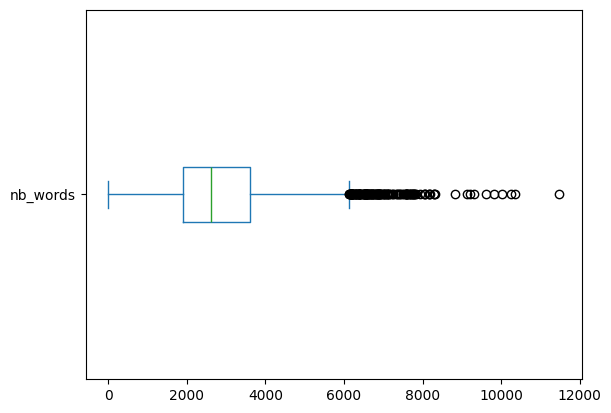

time: 187 ms (started: 2025-03-12 23:03:51 +00:00)


In [20]:
df['nb_words'].plot(kind='box', vert=False)


<Axes: ylabel='Frequency'>

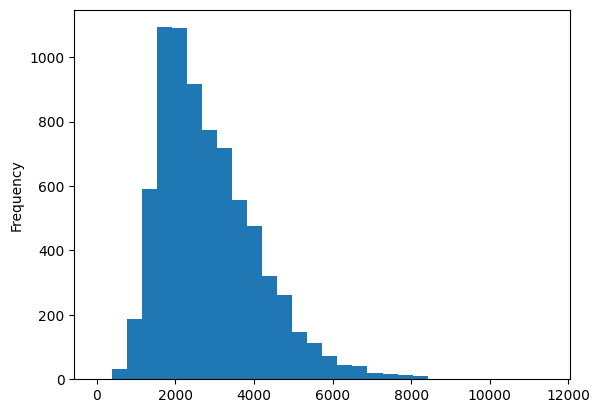

time: 214 ms (started: 2025-03-12 23:03:51 +00:00)


In [21]:
df['nb_words'].plot(kind='hist', bins=30) # , figsize=(8,2)

### Kernel density estimation

https://en.wikipedia.org/wiki/Kernel_density_estimation

if error: "FutureWarning: `distplot` is a deprecated function"

update scipy: `pip3 install --upgrade scipy `

if it persists
    

In [22]:
# only if you got warnings!!!
# import warnings
# warnings.filterwarnings("ignore")

time: 318 µs (started: 2025-03-12 23:03:51 +00:00)


<Axes: xlabel='nb_words', ylabel='Count'>

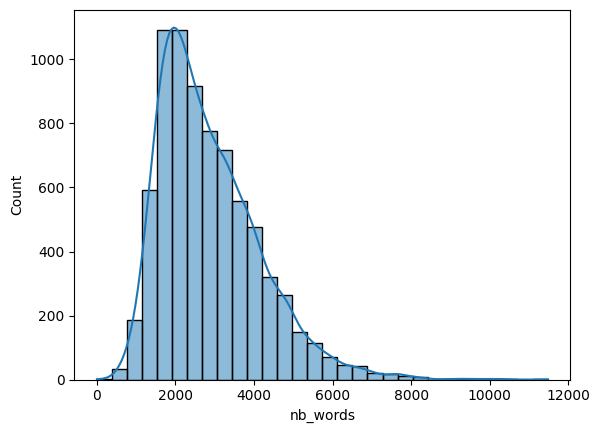

time: 344 ms (started: 2025-03-12 23:03:51 +00:00)


In [23]:
#plt.figure(figsize=(8, 2))
sns.histplot(df['nb_words'], bins=30, kde=True)


# Seaborn docs?
https://seaborn.pydata.org/index.html  
https://seaborn.pydata.org/generated/seaborn.distplot.html

## from where?

catplot shows the relationship between a numerical and one or more categorical variables.
https://seaborn.pydata.org/generated/seaborn.catplot.html

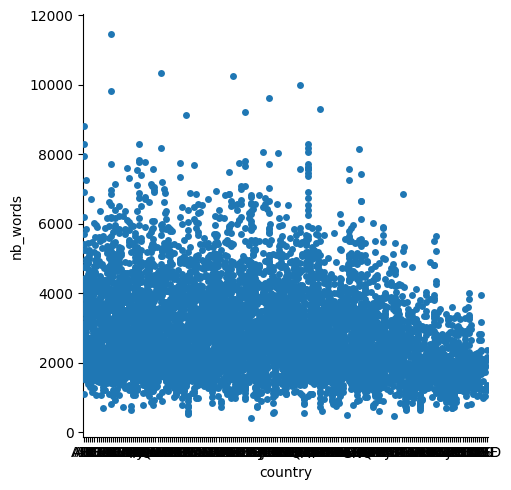

time: 6.64 s (started: 2025-03-12 23:03:52 +00:00)


In [24]:
sns.catplot(data=df, x="country", y="nb_words")

In [25]:
# how to build a selection:
df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])

,country
0,False
1,False
2,False
3,False
4,False
...,...
7503,False
7504,False
7505,False
7506,False


time: 7.9 ms (started: 2025-03-12 23:03:58 +00:00)


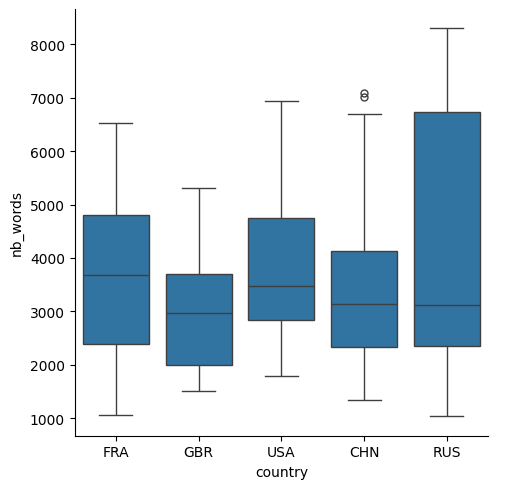

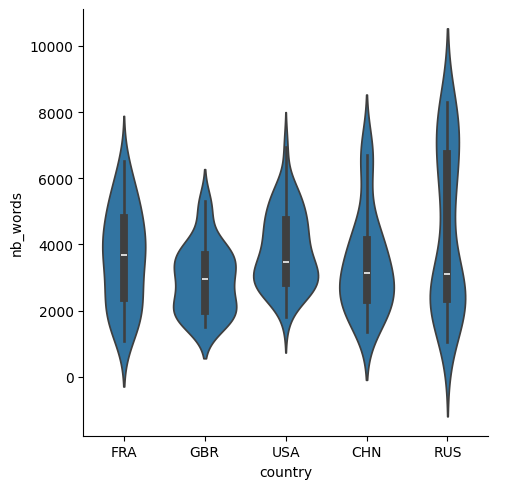

time: 847 ms (started: 2025-03-12 23:03:58 +00:00)


In [26]:
# using the selection
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x="country", y="nb_words", kind='box')
sns.catplot(data=df[where], x="country", y="nb_words", kind='violin')

## significant differences?

Student test? Anova ?

if the boxes (marking the quartiles) don't overlap each other and the sample size is at least 10, then the two groups being compared should have different medians at the 5% level: https://stats.stackexchange.com/questions/262495/reading-box-and-whisker-plots-possible-to-glean-significant-differences-between

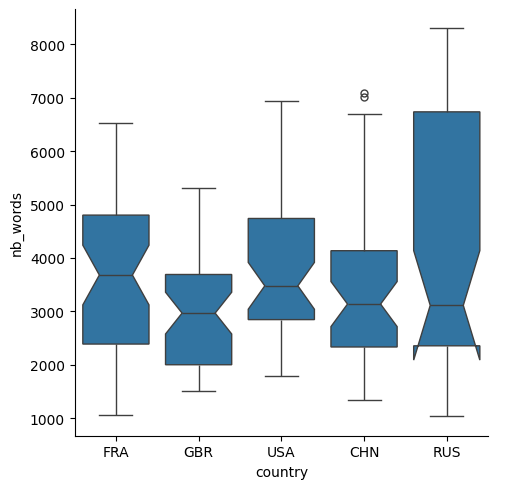

time: 348 ms (started: 2025-03-12 23:03:59 +00:00)


In [27]:
sns.catplot(data=df[where], x="country", y="nb_words", kind='box', notch= True)

## time?

size() returns the number of rows per group  
Why number of countries?

ANSWER: <br>
each country gives one speech per year, and since it is grouped by year then if we take size() of each year, we will get the number of countries that gave a speech during that year

<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

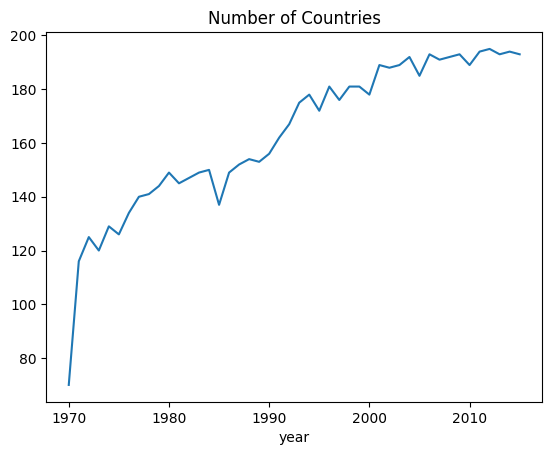

time: 210 ms (started: 2025-03-12 23:03:59 +00:00)


In [28]:
df.groupby('year').size().plot(title="Number of Countries")

when more people want to speak, ...?

ANSWER: <br>
Starting from 1990, we see that more and more countries are participating in the debate, but at the same time, the average speech length decreased, which is obvious because when more countries join and more people want to speak, the total speaking time has to be distributed among the participants.<br>
At the beginning (from 1970 to 1990), since few countries participated, the speech length was much bigger

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

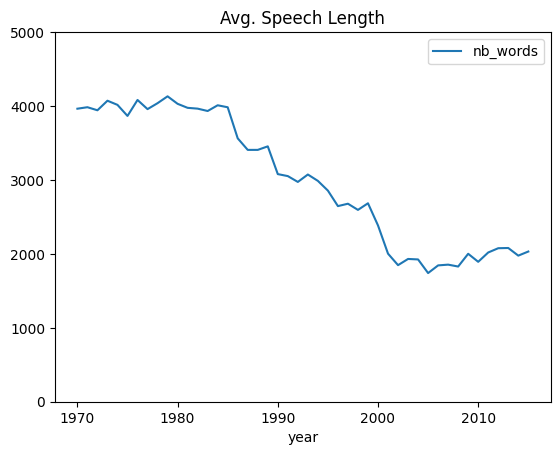

time: 205 ms (started: 2025-03-12 23:04:00 +00:00)


In [29]:
df.groupby('year').agg({'nb_words': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,5000))

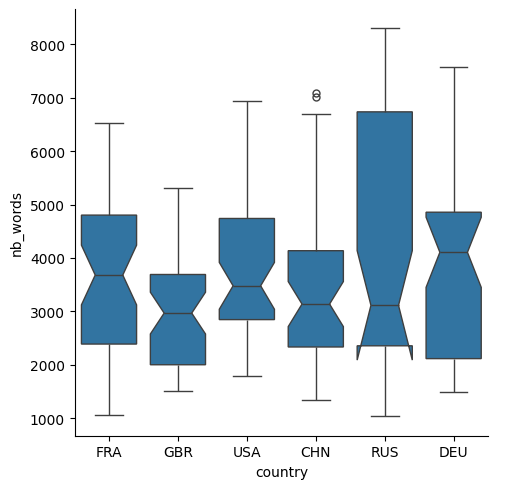

time: 348 ms (started: 2025-03-12 23:04:00 +00:00)


In [30]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS', 'FRG', 'DEU'])
sns.catplot(data=df[where], x="country", y="nb_words", kind='box', notch= True)

## 🚧 todo: When speaking English, do Germans use longer words?

- Compare to British natives, US natives, and French speakers.
- Is the result significant?
- How do you explain this?

ANSWER: <br>
1) The median of word length for the British is the lowest among the 3 countries. They tend to use shorter words with the smallest variations.<br>
The next country using short words on average are the USA, they have some variations which means that sometimes they use longer or shoter words than the average<br>
Then we have France and finally, we have Germany, they use longer words on average<br>
2/3) EXPLANATION <br>
Yes the result is significant, the Germans use longer words because in their native language, words are much longer than the English, so they choose longer words in English due to their native language habits (same for France but less relevant because words are longer in German than French). <br>
German and French diplomats probably use more formal, complex vocabulary compared to native English speakers and they might be using longer synonyms for example "utilize" instead of "use" etc...<br>
Since English is the native language of the UK and US, they will obviously be using shorter words since they are used to it, even in a formal context

In [31]:
# 🚧 todo:
df['avg_wordsize'] = df['nb_chars'] / df['nb_words']

time: 1.72 ms (started: 2025-03-12 23:04:00 +00:00)


<Axes: xlabel='country', ylabel='avg_wordsize'>

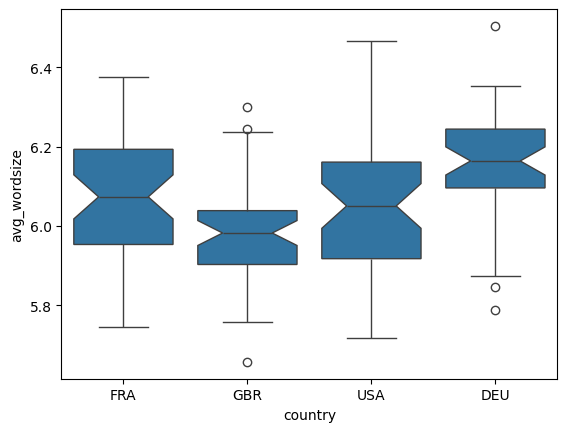

time: 199 ms (started: 2025-03-12 23:04:00 +00:00)


In [32]:
# 🚧 todo:
where = df['country'].isin(['USA', 'GBR', 'FRA', 'DEU'])
sns.boxplot(data=df[where], x="country", y="avg_wordsize", notch=True)

#### 🚧 todo:
answer:



In [33]:
print(df[df['country'] == 'DEU']['avg_wordsize'].mean())
print(df[df['country'] == 'FRA']['avg_wordsize'].mean())
print(df[df['country'] == 'GBR']['avg_wordsize'].mean())
print(df[df['country'] == 'USA']['avg_wordsize'].mean())

6.154938890929928
6.055245716039592
5.9799285063755
6.051773753351524
time: 7.71 ms (started: 2025-03-12 23:04:00 +00:00)


# Let's Zipf it!
## skim through this section if you have followed Hands-on NLP!
but execute the code so that we have the freq_df and start again at word clouds
### Let's first flatten the list

In [34]:
all_words = [word for speech in df['text'].dropna() for word in re.findall(r'\b\w+\b', speech.lower())]
len(all_words)

21746997

time: 11.6 s (started: 2025-03-12 23:04:00 +00:00)


In [35]:
text = "Wait... what?! What? WHAT?! You're telling me that 99.9% of statistics—including this one—are made up?! Made up, I say! Completely, absolutely, 100% made up!"
counter = Counter(re.findall(r'\b\w+\b', text.lower()))
counter

Counter({'wait': 1,
         'what': 3,
         'you': 1,
         're': 1,
         'telling': 1,
         'me': 1,
         'that': 1,
         '99': 1,
         '9': 1,
         'of': 1,
         'statistics': 1,
         'including': 1,
         'this': 1,
         'one': 1,
         'are': 1,
         'made': 3,
         'up': 3,
         'i': 1,
         'say': 1,
         'completely': 1,
         'absolutely': 1,
         '100': 1})

time: 2.85 ms (started: 2025-03-12 23:04:12 +00:00)


### What are the most common words of English?

In [36]:
counter = Counter(all_words)
counter.most_common(22)

[('the', 1899856),
 ('of', 1157672),
 ('and', 797094),
 ('to', 735169),
 ('in', 523852),
 ('a', 340669),
 ('that', 314683),
 ('is', 241832),
 ('for', 230472),
 ('we', 220360),
 ('on', 164270),
 ('this', 140718),
 ('our', 139917),
 ('be', 138408),
 ('it', 138368),
 ('as', 135677),
 ('with', 128166),
 ('by', 127714),
 ('nations', 124783),
 ('are', 121995),
 ('united', 120950),
 ('which', 118545)]

time: 3.49 s (started: 2025-03-12 23:04:12 +00:00)


for even bigger databases, it might be advisable to do the computation iteratively:

In [37]:
counter = Counter()
df['text'].dropna().apply(lambda text: counter.update(re.findall(r'\b\w+\b', text.lower())))
counter.most_common(22)

[('the', 1899856),
 ('of', 1157672),
 ('and', 797094),
 ('to', 735169),
 ('in', 523852),
 ('a', 340669),
 ('that', 314683),
 ('is', 241832),
 ('for', 230472),
 ('we', 220360),
 ('on', 164270),
 ('this', 140718),
 ('our', 139917),
 ('be', 138408),
 ('it', 138368),
 ('as', 135677),
 ('with', 128166),
 ('by', 127714),
 ('nations', 124783),
 ('are', 121995),
 ('united', 120950),
 ('which', 118545)]

time: 14.3 s (started: 2025-03-12 23:04:16 +00:00)


In [38]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df.sort_values('freq',  inplace=True, ascending=False)
freq_df

,freq
the,1899856
of,1157672
and,797094
to,735169
in,523852
...,...
readymade,1
2209th,1
oversaturation,1
algonquin,1


time: 49.2 ms (started: 2025-03-12 23:04:30 +00:00)


<Axes: >

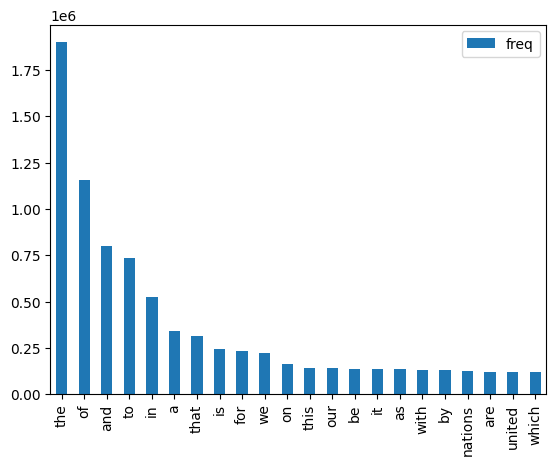

time: 607 ms (started: 2025-03-12 23:04:30 +00:00)


In [39]:
freq_df.head(22).plot(kind='bar')


<Axes: >

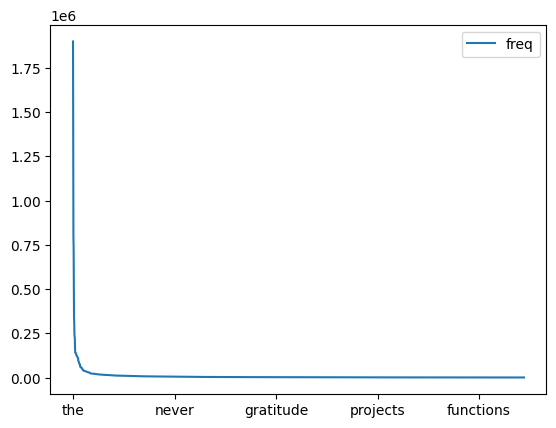

time: 186 ms (started: 2025-03-12 23:04:31 +00:00)


In [40]:
freq_df.head(2222).plot()

<Axes: >

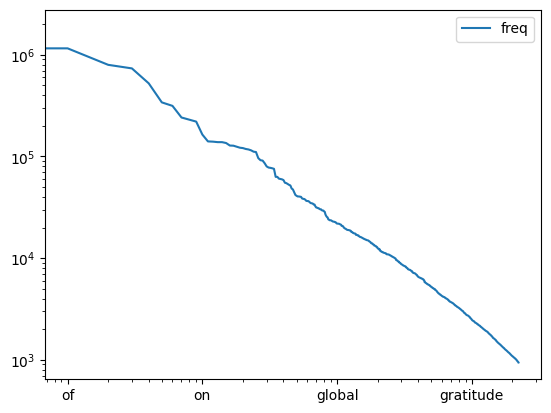

time: 990 ms (started: 2025-03-12 23:04:31 +00:00)


In [41]:
freq_df.head(2222).plot(loglog=True)

futher reading:  
https://en.wikipedia.org/wiki/Zipf's_law  
https://stats.stackexchange.com/questions/6780/how-to-calculate-zipfs-law-coefficient-from-a-set-of-top-frequencies

# Word cloud

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

(-0.5, 399.5, 199.5, -0.5)

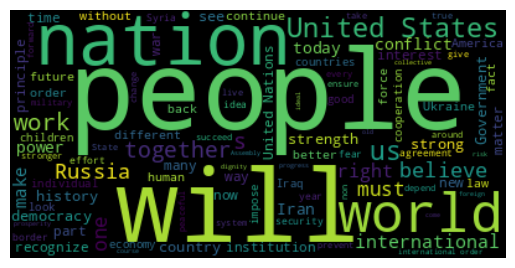

time: 366 ms (started: 2025-03-12 23:04:32 +00:00)


In [42]:
text = df.query("year==2015 and country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

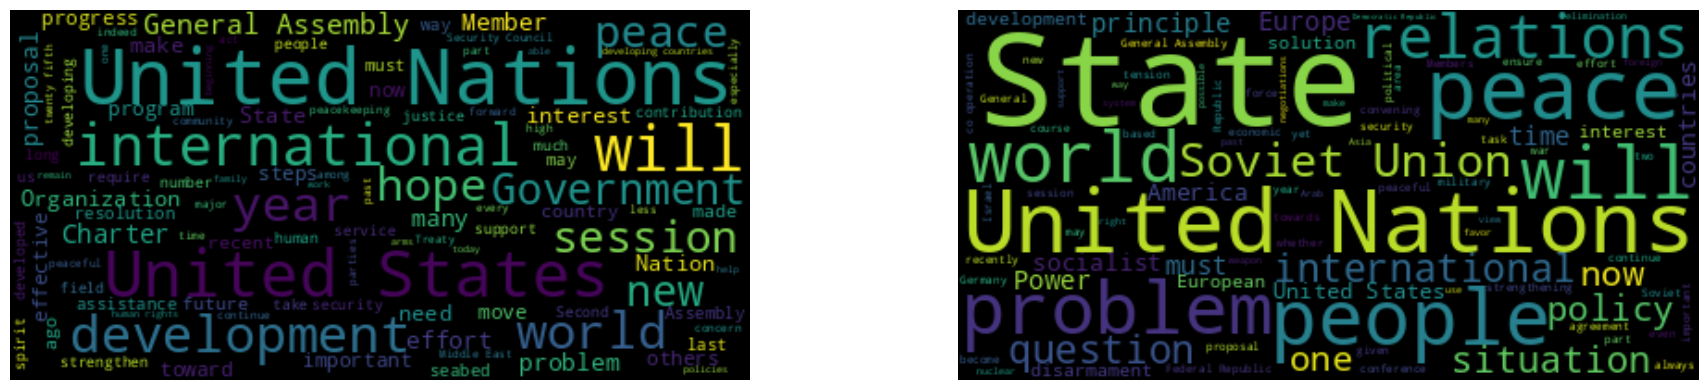

time: 903 ms (started: 2025-03-12 23:04:32 +00:00)


In [43]:
plt.subplots(1, 2, figsize=(20, 4))

text = df.query("country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)
plt.subplot(1, 2, 1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

text = df.query("country=='RUS'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)

plt.subplot(1, 2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()

(-0.5, 399.5, 199.5, -0.5)

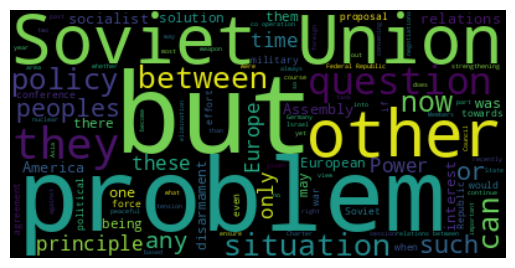

time: 544 ms (started: 2025-03-12 23:04:33 +00:00)


In [44]:
wc = WordCloud(max_words=100, stopwords=freq_df.head(50).index)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

the `generate_from_frequencies` function allows to generate without stopwords directly from a Counter:

(-0.5, 399.5, 199.5, -0.5)

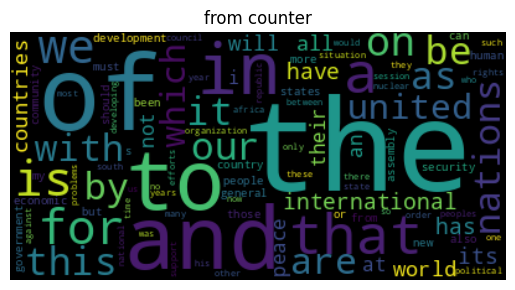

time: 560 ms (started: 2025-03-12 23:04:34 +00:00)


In [45]:
wc.generate_from_frequencies(counter)
plt.title('from counter')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Index

We want to build an inverted index:
- make a df such that for every type, we have a 1 if the document contains the type, 0 if not.
- for every type, give a list of document ids

# 🚧 todo:
- how many types do we have?
- how many documents do we have?

In [46]:
print(len(counter),'types') #unique words in the dataset
print(df['text'].dropna().shape[0],'documents') #count of speeches


54980 types
7507 documents
time: 10.4 ms (started: 2025-03-12 23:04:34 +00:00)


In [47]:
list(freq_df.index[66:77])

['they',
 'political',
 'rights',
 'one',
 'these',
 'africa',
 'there',
 'only',
 'so',
 'support',
 'such']

time: 5.87 ms (started: 2025-03-12 23:04:34 +00:00)


In [48]:
df[33:36]

,un-general-debates-blueprint.csv,year,country,country_name,speaker,position,text,nb_chars,nb_words_theoritical,nb_pages,nb_minutes,nb_words,avg_wordsize
33,25.0,1970.0,KEN,Kenya,Mr. MUNGAI,unknown,"\n36.\t Mr. President, on behalf of His Excell...",21569.0,4589.148936,7.648582,30.594326,3412,6.321512
34,25.0,1970.0,KHM,Cambodia,Mr. KOUN WICK,unknown,4.\t Before I begin this speech I should like ...,27661.0,5885.319149,9.808865,39.235461,4523,6.115631
35,25.0,1970.0,KWT,Kuwait,Mr. ALJABER,unknown,"1.\t Mr. President, your election to the aug...",17114.0,3641.276596,6.068794,24.275177,2782,6.151689


time: 84.1 ms (started: 2025-03-12 23:04:34 +00:00)


In [49]:
A = np.zeros((11, 3))
A.nbytes

264

time: 5.45 ms (started: 2025-03-12 23:04:34 +00:00)


we will first try the naïve way, to find out that this easily gets too slow:

In [50]:
for i,t in enumerate(freq_df.index[66:77]):
    for j, text in enumerate(df['text'][33:36]):
        # Tokenize text using regex
        tokens = set(re.findall(r'\b\w+\b', text.lower()))  # Use set for faster lookup
        if t in tokens:
            A[i, j] = 1  # Mark presence of token in text
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

time: 126 ms (started: 2025-03-12 23:04:34 +00:00)


In [51]:
A.nbytes

264

time: 1.86 ms (started: 2025-03-12 23:04:35 +00:00)


In [52]:
A = np.zeros((100, 7507)) # understand this: 100 most frequent words, 7507 speeches
for i,t in tqdm(enumerate(freq_df.index[:100])):
    for j, text in enumerate(df['text'][33:100]): # play with the range to see how slow your machine is
        tokens = set(re.findall(r'\b\w+\b', text.lower()))
        if t in tokens:
               A[i,j] =1
# can you do that loop more efficiently? This is not an obligatory task.
A


0it [00:00, ?it/s]

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

time: 13.2 s (started: 2025-03-12 23:04:35 +00:00)


In [53]:
A.nbytes

6005600

time: 1.58 ms (started: 2025-03-12 23:04:48 +00:00)


In [54]:
#EFFICIENT IMPLEMENTATION

top_words = freq_df.index[:100]

#tokenize all documents once and store them in a dictionary
doc_tokens = df['text'].dropna().apply(lambda text: set(re.findall(r'\b\w+\b', text.lower())))

# create the matrix
A = np.zeros((len(top_words), len(doc_tokens)), dtype=np.uint8)

# fill the matrix using vectorized operations
for i, word in enumerate(tqdm(top_words)):
    A[i, :] = doc_tokens.apply(lambda tokens: 1 if word in tokens else 0).values

A.nbytes

  0%|          | 0/100 [00:00<?, ?it/s]

750700

time: 14.6 s (started: 2025-03-12 23:04:48 +00:00)


### 🚧 todo:

What would be the size of the complete table?


In [55]:
# 🚧 todo:
print("Size of the matrix: ", A.nbytes, " bytes")
print("Size of the matrix: ", A.nbytes / 1024, "KB")

Size of the matrix:  750700  bytes
Size of the matrix:  733.10546875 KB
time: 956 µs (started: 2025-03-12 23:05:02 +00:00)


### 🚧 todo:

How long will it take to fill the complete table?


In [56]:
# 🚧 todo:
# i take 9 seconds per 100, should be about linear
time_per_100 = 9
total_speeches = 7507

time_seconds = (time_per_100 / 100) * total_speeches
time_minutes = time_seconds / 60
time_hours = time_minutes / 60

print(f"Estimated Time: ",time_seconds," seconds, ", time_minutes," minutes, ", time_hours, " hours")


Estimated Time:  675.63  seconds,  11.2605  minutes,  0.187675  hours
time: 1.18 ms (started: 2025-03-12 23:05:02 +00:00)


### redoing the same thing with CountVectorizer

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

df[33:36].text

,text
33,"\n36.\t Mr. President, on behalf of His Excell..."
34,4.\t Before I begin this speech I should like ...
35,"1.\t Mr. President, your election to the aug..."


time: 404 ms (started: 2025-03-12 23:05:02 +00:00)


In [58]:
vectorizer = CountVectorizer(vocabulary=freq_df.index[66:77], binary=True, min_df=1, lowercase=False)
# understand the options:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
X = vectorizer.fit_transform(df[33:36].text)
print(vectorizer.get_feature_names_out())
print(X.toarray())


['they' 'political' 'rights' 'one' 'these' 'africa' 'there' 'only' 'so'
 'support' 'such']
[[1 1 1 0 1 0 1 1 1 1 1]
 [1 1 0 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 0 1]]
time: 13.8 ms (started: 2025-03-12 23:05:03 +00:00)


In [59]:
# make it pretty:
d = {c:X.toarray()[i] for i,c in enumerate(df[33:36].index)}
df_cv = pd.DataFrame.from_dict(d,  orient='index',columns=freq_df.index[66:77])
df_cv

,they,political,rights,one,these,africa,there,only,so,support,such
33,1,1,1,0,1,0,1,1,1,1,1
34,1,1,0,1,1,0,1,1,1,1,1
35,1,1,1,1,1,0,1,1,1,0,1


time: 24.6 ms (started: 2025-03-12 23:05:03 +00:00)


## trying the complete set of documents with the complete vocabulary

In [60]:
vectorizer = CountVectorizer(vocabulary=freq_df.index, binary=True, min_df=1, lowercase=False)
X = vectorizer.fit_transform(df['text'].dropna())
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[:11])
print(X.toarray())

54980
['the' 'of' 'and' 'to' 'in' 'a' 'that' 'is' 'for' 'we' 'on']
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]]
time: 16.8 s (started: 2025-03-12 23:05:03 +00:00)


- wow! comparably fast!
#### 🚧 todo:
- can you get the vector of "the"? is there a speech that doesn't use it?


answer:

In [61]:
the_index = list(vectorizer.get_feature_names_out()).index("the") #index of "the"

time: 24.1 ms (started: 2025-03-12 23:05:20 +00:00)


In [62]:
the_vector = X.toarray()[:, the_index] # column for "the"

time: 600 ms (started: 2025-03-12 23:05:20 +00:00)


In [63]:
speech_indices_without_the = np.where(the_vector == 0)[0]
print("Speeches without 'the': " ,speech_indices_without_the)

Speeches without 'the':  []
time: 2.77 ms (started: 2025-03-12 23:05:20 +00:00)


#### 🚧 todo: some visualizations of the vectorization

- make 2D scatterplots of the vectorization using PCA and t-SNE.
- use the years as hue
- explain why this looks so different
- hard: choose a cluster that looks mainly stemming from earlier texts, another stemming from recent texts, and find a few examples of terms that makes them different.

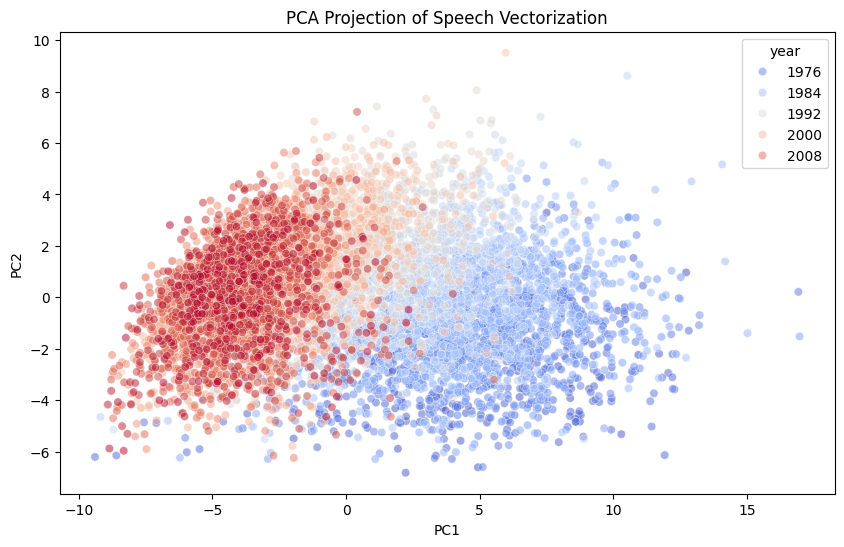

time: 31.8 s (started: 2025-03-12 23:05:20 +00:00)


In [64]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# convert to DataFrame for easier plotting
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["year"] = df["year"].iloc[:X_pca.shape[0]].values

# Now proceed with visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="year", palette="coolwarm", alpha=0.5)
plt.title("PCA Projection of Speech Vectorization")
plt.show()

In [67]:
# THIS IS VERY COMPUTATIONALY EXPENSIVE (TAKES MANY MINUTES TO EXECUTE), UNCOMMENT IF U DONT MIND

#tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
#X_tsne = tsne.fit_transform(X.toarray())  #### THIS IS VERY COMPUTATIONALY EXPENSIVE (TAKES MANY MINUTES TO EXECUTE), UNCOMMENT IF U DONT MIND

# convert to DataFrame
#df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
#df_tsne["year"] = df["year"].iloc[:X_tsne.shape[0]].values  # years as hue

# plot
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="year", palette="coolwarm", alpha=0.5)
#plt.title("t-SNE Projection of Speech Vectorization")
#plt.show()

time: 329 µs (started: 2025-03-12 23:17:03 +00:00)


# analyze two clusters of the PCA plot: top right and bottom left:

In [ ]:
# Define clusters based on PCA components
cluster_1 = pca_df[pca_df["PC1"] > 0.8].index
cluster_2 = pca_df[(pca_df["PC1"] < -0.2) & (pca_df["PC2"] > 0.8)].index

# Extract corresponding texts
...
diff_df = diff_df.sort_values(by=[ "Cluster 2 (PC1 < -0.2, PC2 > 0.8)", "Cluster 1 (PC1 > 0.8)"], ascending=False)
# Show distinctive words
diff_df.head(10)
# of both clusters (since we have a binary vectorizer, we only get present and absent words)


# another big vocabulary:
- we could grab a pageview file here https://dumps.wikimedia.org/other/pageviews/2022/2022-01/ and  produce a list of potential terms from it
- it's easier to use wikidata, and we concentrate on people:

here is code that grabs it and produces a file of person names. this API is unstable, so i propose to download directly the result on my website, see code below.

In [ ]:
# you can skip this cell if you are only interested in the result, see next cell

def fetch_wikidata_humans(limit=10000, offset=0):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    query = f"""
    SELECT ?human ?humanLabel WHERE {{
      ?human wdt:P31 wd:Q5.  # Humans (Q5)
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
    }}
    LIMIT {limit}
    OFFSET {offset}
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return results

# Fetch the first batch
humans_data = []
offset = 0
batch_size = 5000  # Fetch this batch size at a time

while True:
    print(f"Fetching humans from offset {offset}")
    results = fetch_wikidata_humans(limit=batch_size, offset=offset)
    if "results" in results and "bindings" in results["results"]:
        batch = results["results"]["bindings"]
        if not batch:
            break  # Stop if no more results

        for result in batch:
            humans_data.append({
                "Wikidata ID": result["human"]["value"].split("/")[-1],
                "Name": result["humanLabel"]["value"]
            })
        offset += batch_size  # Move to the next batch
    else:
        break  # Stop if no valid response

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(humans_data)

# write the Name column to a file
df['Name'].to_csv('wikidata_names.txt', index=False)

In [ ]:
file_name = 'wikidata_names.txt'
zip_file = file_name + '.zip'
url = 'https://gerdes.fr/saclay/inforet/' + zip_file

if os.path.exists(file_name):
    print('File already present')
else:
    print('Downloading the file...')
    os.system(f'curl -o {zip_file} {url}')
    os.system(f'unzip {zip_file}')

In [ ]:
# read the file back into a simple list, one item per line
with open('wikidata_names.txt') as f:
	names = set(f.read().splitlines())
names

In [ ]:
vectorizer = CountVectorizer(vocabulary=names, binary=True, min_df=1, lowercase=False, ngram_range=(1,4))
X = vectorizer.fit_transform(df.text.dropna())
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[:11])
X

#### 🚧 todo:
- find the most frequently cited names
- analyze who cites
- analyze the length of the cited names in tokens


In [ ]:
...

In [ ]:
...

In [ ]:
...

- check this: https://en.wikipedia.org/wiki/Kofi_Annan

# Homework

complete the # 🚧 todo:

and
## find the most frequently encountered person entity
- in number of speeches
- in number of occurrences




### Before submitting, check:
- I have not imported any other modules
- I have put explanations between the lines of code (either inline or in separate cells)
- My notebook runs all the way through when I hit
  1. the ↻ button and then
  2. the ⏩︎ button (remove or comment out cells that are too slow and not needed).
  